In [2]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# Task 1

In [3]:
def lj_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Task 2

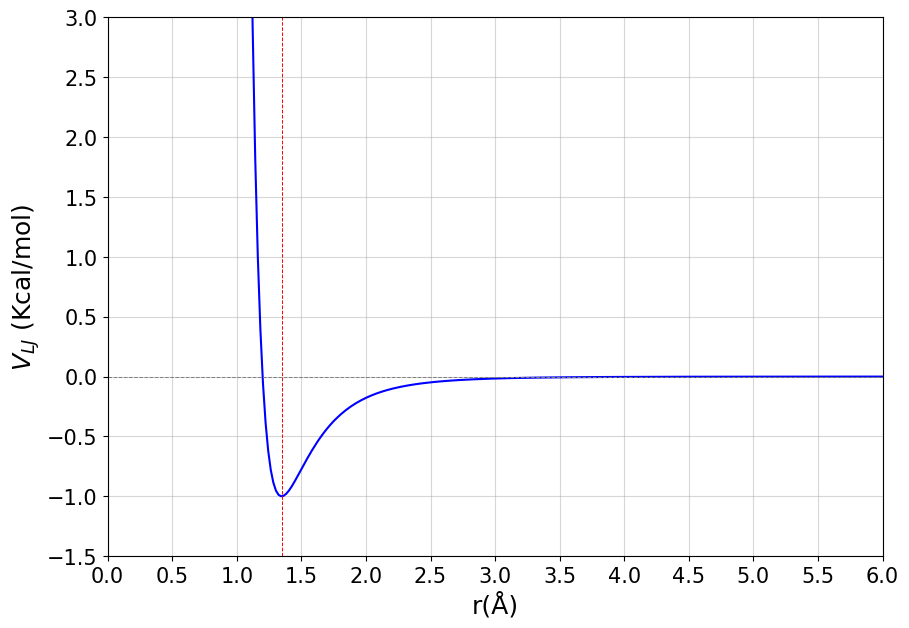

In [4]:
epsilon = 1  
sigma = 1.2  

# Generate a range of distances
r = np.linspace(0, 8.0, 400)  

# Calculate the Lennard-Jones potential for each distance
V = lj_potential(r, epsilon, sigma)

# Plot the Lennard-Jones potential
plt.figure(figsize=(10, 7))
plt.plot(r, V, color='b')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(2**(1/6) * sigma, color='red', linestyle='--', linewidth=0.7)
plt.xlabel(r'r(Å)',fontsize=18)
plt.ylabel(r'$V_{LJ}$ (Kcal/mol)',fontsize=18)
plt.xticks(np.arange(0, 6.5, 0.5), fontsize=15)  
plt.yticks(np.arange(-1.5, 3.5, 0.5), fontsize=15) 
plt.ylim(-1.5,3)
plt.xlim(0,6)
plt.grid(alpha=0.5)
plt.show()

# Task 3

In [5]:
def distance(position1,position2):
    r_diff=position1-position2
    r2=np.sqrt(np.dot(r_diff,r_diff))
    return r2

In [6]:
atom1=np.array([7.863018,8.643432,2.931084])
atom2=np.array([0.162484,4.518598,0.256988])

r12=distance(atom1,atom2)
potential=lj_potential(r12,epsilon,sigma)
print(f' Potential Energy: {potential} Kcal/mol')

 Potential Energy: -2.0542773028568357e-05 Kcal/mol


In [7]:
atoms=np.array([[7.863018,8.643432,2.931084],[0.162484,4.518598,0.256988],[5.994411,9.820224,6.759556],[2.647758,4.404009,3.695358],[6.158238,9.254576,9.648397]])
num_atoms=atoms.shape[0]
energy=0
for i in range (num_atoms):
    for j in range(i+1,num_atoms):
        r=distance(atoms[i],atoms[j])
        energy+=lj_potential(r,epsilon,sigma)
print(f'Potential enegy of system consisting of {num_atoms} atoms: {energy} Kcal/mol')

Potential enegy of system consisting of 5 atoms: -0.02214265056327113 Kcal/mol


# Task 4

In [11]:
def read_xyz(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        num_particles = int(lines[0])
        atom_data = [line.split() for line in lines[2:2 + num_particles]]
        atom_types = [data[0] for data in atom_data]
        positions = np.array([[float(x) for x in data[1:4]] for data in atom_data])
    return positions

atoms_position=read_xyz('argons.xyz')
num_atoms=atoms_position.shape[0]
print(num_atoms)
energy=0
for i in range (num_atoms):
    for j in range(i+1,num_atoms):
        r=distance(atoms_position[i],atoms_position[j])
        energy+=lj_potential(r,epsilon,sigma)
print(f'Potential enegy of system consisting of {num_atoms} atoms: {energy} Kcal/mol')

35
Potential enegy of system consisting of 35 atoms: -3.2218844333364483 Kcal/mol
